# Crop Yield Prediction | Indian Agriculture Dataset 2023

## Import the libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import time

## Read the dataset

In [2]:
# Load the dataset
df = pd.read_csv("crop_production.csv")

# Sort the DataFrame by 'Crop_Year' and display the first 10 rows
df.sort_values('Crop_Year').tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
152235,Odisha,JAGATSINGHAPUR,2023,Summer,Sesamum,7.0,1.9
152234,Odisha,JAGATSINGHAPUR,2023,Summer,Moong(Green Gram),45996.0,16650.6
152233,Odisha,JAGATSINGHAPUR,2023,Summer,Horse-gram,13.0,3.6
156175,Odisha,MALKANGIRI,2023,Winter,Moong(Green Gram),52.0,12.2
148201,Odisha,BALESHWAR,2023,Summer,Groundnut,2079.0,2490.6


## Set the datatypes of columns and remove 'na' values

In [3]:
# Set data types
dtypes = {
    'State_Name': 'object',
    'District_Name': 'object',
    'Crop_Year': 'int64',
    'Season': 'object',
    'Crop': 'object',
    'Area': 'float64',
    'Production': 'int64'
}

df = df.dropna().astype(dtypes)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 14.8+ MB


## Data Preprocessing

In [4]:
# Data preprocessing
X = df.drop(['Production'], axis=1)  # Features

# Data preprocessing
categorical_columns = ['State_Name', 'District_Name', 'Season', 'Crop']

# Encode only the selected categorical variables
X_categorical = pd.get_dummies(df[categorical_columns])

# Combine the categorical variables with the numerical ones
X = pd.concat([X.drop(categorical_columns, axis=1), X_categorical], axis=1)

y = df['Production']  # Target variable

## Split the dataset into training and testing

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
training_times = {}

## Algorithms

In [8]:
# Linear Regression

start_time = time.time()

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

end_time = time.time()
training_time = end_time - start_time

training_times['Linear Regression'] = training_time
    
y_pred_linear = linear_reg_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression Mean Squared Error: {mse_linear}')

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f'Linear Regression Root Mean Squared Error: {rmse_linear}')

r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression R-squared: {r2_linear*100}')

Linear Regression Mean Squared Error: 330078830699171.94
Linear Regression Root Mean Squared Error: 18168071.73860704
Linear Regression R-squared: 17.959777372401632


In [9]:
# Random Forest

start_time = time.time()
random_forest_model = RandomForestRegressor(n_estimators=5)
random_forest_model.fit(X_train_scaled, y_train)

end_time = time.time()
training_time = end_time - start_time

training_times['Random Forest'] = training_time

y_pred_rf = random_forest_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Random Forest Root Mean Squared Error: {rmse_rf}')

r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest R-squared: {r2_rf*100}')

Random Forest Mean Squared Error: 24242144878644.812
Random Forest Root Mean Squared Error: 4923631.269565666
Random Forest R-squared: 93.97467884080363


In [10]:
# Gradient Boosting

start_time = time.time()

gradient_boosting_model = GradientBoostingRegressor(n_estimators=5)
gradient_boosting_model.fit(X_train_scaled, y_train)

end_time = time.time()
training_time = end_time - start_time

training_times['Gradient Boosting'] = training_time

y_pred_gb = gradient_boosting_model.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting Mean Squared Error: {mse_gb}')

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f'Gradient Boosting Root Mean Squared Error: {rmse_gb}')

r2_gb = r2_score(y_test, y_pred_gb)
print(f'Gradient Boosting R-squared: {r2_gb*100}')

Gradient Boosting Mean Squared Error: 220527011497694.28
Gradient Boosting Root Mean Squared Error: 14850151.901502363
Gradient Boosting R-squared: 45.18859303898045


In [11]:
# Decision Tree

start_time = time.time()

decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

end_time = time.time()
training_time = end_time - start_time

training_times['Decision Tree'] = training_time

y_pred_dt = decision_tree_model.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Decision Tree Mean Squared Error: {mse_dt}')

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'Decision Tree Root Mean Squared Error: {rmse_dt}')

r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree R-squared: {r2_dt*100}')

Decision Tree Mean Squared Error: 19026934490044.066
Decision Tree Root Mean Squared Error: 4361987.447258883
Decision Tree R-squared: 95.27090562524869


In [12]:
# K-Nearest Neighbors

start_time = time.time()

knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train_scaled, y_train)

end_time = time.time()
training_time = end_time - start_time

training_times['K-Nearest Neighbors'] = training_time

y_pred_knn = knn_model.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Mean Squared Error: {mse_knn}')

rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f'K-Nearest Neighbors Root Mean Squared Error: {rmse_knn}')

r2_knn = r2_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors R-squared: {r2_knn}')

K-Nearest Neighbors Mean Squared Error: 46144477705094.05
K-Nearest Neighbors Root Mean Squared Error: 6792972.670715969
K-Nearest Neighbors R-squared: 0.8853091179479369


## Plot the accuracy graph

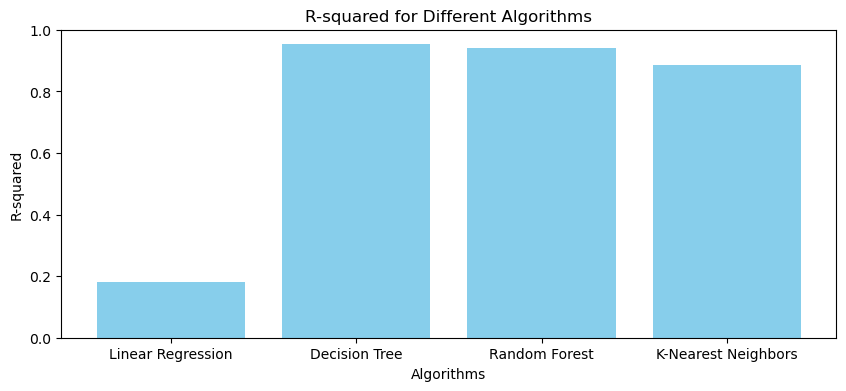

In [13]:
# Assuming you have a dictionary 'mse_results' with algorithm names as keys and MSE values as values
mse_results = {
    'Linear Regression': r2_linear,
    'Decision Tree': r2_dt,
    'Random Forest': r2_rf,
    'K-Nearest Neighbors': r2_knn
}

# Plot the MSE results
plt.figure(figsize=(10, 4))
plt.bar(mse_results.keys(), mse_results.values(), color='skyblue')
plt.title('R-squared for Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('R-squared')
plt.show()

## Plot the time taken graph

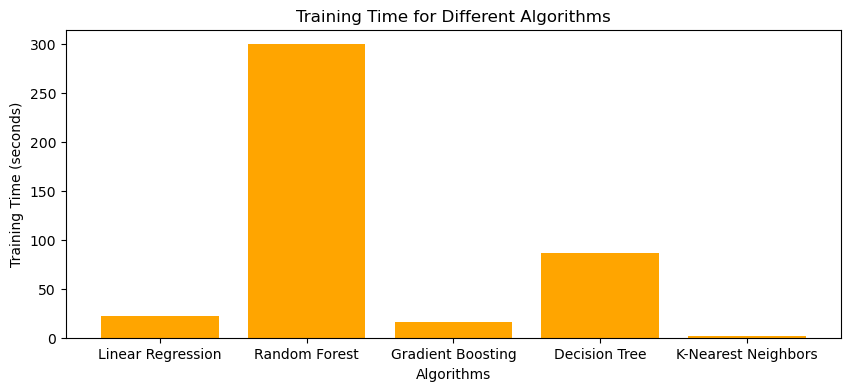

In [14]:
# Plot the time taken
plt.figure(figsize=(10, 4))
plt.bar(training_times.keys(), training_times.values(), color='orange')
plt.title('Training Time for Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Training Time (seconds)')
plt.show()

The ideal approach to finding the best algorithm is that it should take less time, have a very low Mean Squared Error (MSE), and achieve the highest R-squared value.

In our project, out of the five algorithms we tested, Decision Tree is the top performer as it took less time and achieves the highest R-squared score.

Decision Tree Won !

## Save Decision Tree Model

In [15]:
import pickle

# Save the model to a file
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(decision_tree_model, file)

## Single prediction

In [23]:
model = pickle.load(open('decision_tree_model.pkl', 'rb'))

dataset = pd.read_csv('crop_production.csv')

dataset_x = dataset.drop('Production', axis=1)

train_dummy_crop = pd.get_dummies(dataset_x)

scaler_crop = StandardScaler()
scaler_crop.fit_transform(train_dummy_crop)

# Define the new data point
new_data = pd.DataFrame({
    'State_Name': ['Andaman and Nicobar Islands'],
    'District_Name': ['NICOBARS'],
    'Crop_Year': [2000],
    'Season': ['Kharif'],
    'Crop': ['Arecanut'],
    'Area': [15]
})


new_df = pd.DataFrame(new_data, columns=["State_Name", "District_Name", "Crop_Year", "Season", "Crop", "Area"])
new_df = pd.get_dummies(new_df)
new_df = new_df.reindex(columns=train_dummy_crop.columns, fill_value=0)

prediction = model.predict(scaler_crop.transform(new_df))

# Print the prediction
print(f'The predicted Yield for the given input is: {prediction[0]/new_data["Area"].values[0]}')

The predicted Yield for the given input is: 0.4666666666666667


Yield = Production/Area

This formula represents the yield as the amount of agricultural production per unit of land area.